####Name: Kai Chung Ying        
####Course: CSC 529       
####Homework 1

##Problem 1.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load the data from the original source link
wine=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data",sep=",",header=None)
#Check the data 
wine.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
#The data size including the class labels
wine.shape

(178, 14)

In [4]:
#Assign the Variables Names based on the original provided 
wine.columns=["Labels","Alcohol","Malic_acid","Ash","Alca_ash","Magnesium","phenols",
           "Flavanoids","Nonflav_phenols","Proanthocyanins",
           "Color_int","Hue","diluted_wines","Proline"]
wine.head(5)

,Labels,Alcohol,Malic_acid,Ash,Alca_ash,Magnesium,phenols,Flavanoids,Nonflav_phenols,Proanthocyanins,Color_int,Hue,diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
#Assign the Class label a separated table
y=wine["Labels"]
print(y.shape)
y.head(5)

(178,)


0    1
1    1
2    1
3    1
4    1
Name: Labels, dtype: int64

In [6]:
#Assign the rest of the predictor variables to a separated table.
x=wine.ix[:,1:]
print(x.shape)
x.head(5)

(178, 13)


,Alcohol,Malic_acid,Ash,Alca_ash,Magnesium,phenols,Flavanoids,Nonflav_phenols,Proanthocyanins,Color_int,Hue,diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [261]:
#Split the original dataset into THREE separated tables based on their Classes
c1_data=wine[wine["Labels"]==1]
c2_data=wine[wine["Labels"]==2]
c3_data=wine[wine["Labels"]==3]

print("Size of Class 1:",c1_data.shape)
print("Size of Class 2:",c2_data.shape)
print("Size of Class 3:",c3_data.shape)

Size of Class 1: (59, 14)
Size of Class 2: (71, 14)
Size of Class 3: (48, 14)


In [100]:
#Randomly extracting the TWO columns of variables from original data
#for ploting against the THREE classes labels
c1_sub1 = c1_data.loc[:,["Alcohol","diluted_wines"]]
c2_sub1=c2_data[["Alcohol","diluted_wines"]]
c3_sub1=c3_data[["Alcohol","diluted_wines"]]

In [102]:
#Transform the above data to numpy array format
c1_sub1=np.array(c1_sub1.T)
c2_sub1=np.array(c2_sub1.T)
c3_sub1=np.array(c3_sub1.T)

/Users/KevQuant/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


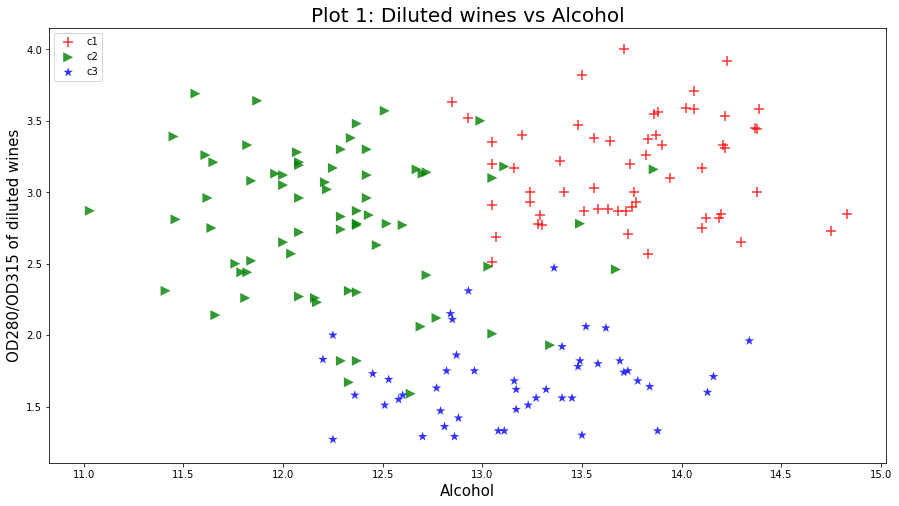

In [205]:
import numpy as np
import matplotlib.pyplot as plt
 
data = (c1_sub1, c2_sub1, c3_sub1)
colors = ("red", "green", "blue")
groups = ("c1", "c2", "c3")
markers = ("+",">","*")
 
# Create plot
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot( 1,1,1,axisbg="1.0")
 
for data, color, group, mark in zip(data, colors, groups, markers):
    x, y = data
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=100, label=group, marker=mark)
 
ax.set_title('Plot 1: Diluted wines vs Alcohol', size=20)
ax.set_xlabel("Alcohol", size=15)
ax.set_ylabel("OD280/OD315 of diluted wines", size=15)
plt.legend(loc=2)
plt.show()

##Problem 1-a

Ans:

The random chosen TWO variables are NOT able to completely classify the class labels as we seen on the above plot. The partition of the classes are all mixed with different labels classes. The class separability in this space is NOT good enough classify the Class labels.

##Problem 1b.

In [258]:
wine.head(2)

,Labels,Alcohol,Malic_acid,Ash,Alca_ash,Magnesium,phenols,Flavanoids,Nonflav_phenols,Proanthocyanins,Color_int,Hue,diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


####Correlation for predictor variables

In [7]:
wine_x = wine.ix[:,1:]
print(wine_x.shape)
wine_x.corr()

(178, 13)


,Alcohol,Malic_acid,Ash,Alca_ash,Magnesium,phenols,Flavanoids,Nonflav_phenols,Proanthocyanins,Color_int,Hue,diluted_wines,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alca_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflav_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color_int,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


Corrleation between predictor variables are always matter for Modelling. The more independence between variables probably offers the less adverse affection impact on the Model. For example, Naive Bayes Classification assume that ALL the predictor variables are independent to each other. 

Also, if we found some variables are highly dependent to each other, we could consider to eliminate one of the variables for the Model, and that could reduce the complexity of the final Model because we always look for a simpliest model with the most accurate prediction result. Now, let's check out the feature selection process below to decide the variables selection

Based on the above tables, we found some of the variables have very low correlation, for example:

Magnesium vs Malic_acid

Proanthocyanins vs Ash

Color intensity vs phenols

In [257]:
wine_x = np.array(wine.ix[:,1:])
wine_y = np.array(wine.ix[:,0])
print("The first row of Variables: ")
print(wine_x[0])
print("All Class Labels: ")
print(wine_y)

The first row of Variables: 
[  1.42300000e+01   1.71000000e+00   2.43000000e+00   1.56000000e+01
   1.27000000e+02   2.80000000e+00   3.06000000e+00   2.80000000e-01
   2.29000000e+00   5.64000000e+00   1.04000000e+00   3.92000000e+00
   1.06500000e+03]
All Class Labels: 
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


#####Feature Selection by SelectKBest function with Chi-Square statistics

In [202]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
wine_x_new = SelectKBest(chi2, k=2).fit_transform(wine_x,wine_y)
print(wine_x_new.shape)
wine_x_new[0:5]

(178, 2)


array([[    5.64,  1065.  ],
       [    4.38,  1050.  ],
       [    5.68,  1185.  ],
       [    7.8 ,  1480.  ],
       [    4.32,   735.  ]])

Based on the above Univariate feature selection by using chi-square stat, the best 2 variables for the classification are "Proline" and "Color intensity". The Ch-2 statistic is used to measure the dependence of the random variables (Boolean / Numerical). 
The "SelectKBest" function with the ch-2 stat and pre-set k (The number of best relevant variables to be choosen) REMOVES the most likely independence of variables which shows the least relationship between variables and Class Labels. In other words, the most related variables for classification are remained by "SelectKBest" function. The plot below shows how is the boundary clearance between the Class labels based on "Proline" and "Color intensity" variables.

In [181]:
#Randomly extracting the TWO columns of variables from original data
#for ploting against the THREE classes labels
c1_sub2 = c1_data.loc[:,["Color_int","Proline"]]
c2_sub2 = c2_data[["Color_int","Proline"]]
c3_sub2 = c3_data[["Color_int","Proline"]]

In [182]:
#Transform the above data to numpy array format
c1_sub2=np.array(c1_sub2.T)
c2_sub2=np.array(c2_sub2.T)
c3_sub2=np.array(c3_sub2.T)

/Users/KevQuant/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


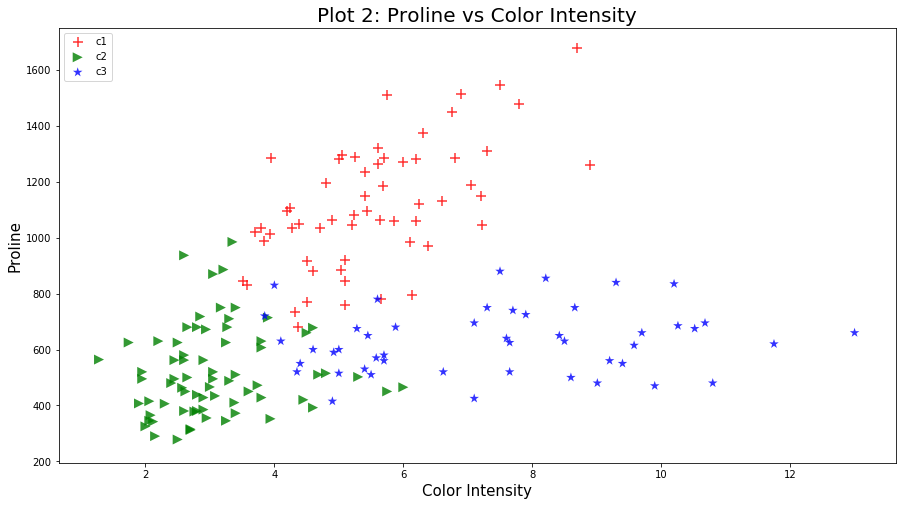

In [204]:
import numpy as np
import matplotlib.pyplot as plt
 
data = (c1_sub2, c2_sub2, c3_sub2)
colors = ("red", "green", "blue")
groups = ("c1", "c2", "c3")
markers = ("+",">","*")
 
# Create plot
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot( 1,1,1,axisbg="1.0")
 
for data, color, group, mark in zip(data, colors, groups, markers):
    x, y = data
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=100, label=group, marker=mark)
 
ax.set_title('Plot 2: Proline vs Color Intensity', size=20)
ax.set_xlabel("Color Intensity", size=15)
ax.set_ylabel("Proline", size=15)
plt.legend(loc=2)
plt.show()

##Problem 1-b

Ans:

The above plot shows that the class labels are classified by the TWO variables ("color Intensity" and "Proline"). The graph shows a better divided partition between the THREE classes comparaing to the Plot 1 above(diluted wine vs Alcohol), especially the boundary is very clear between the Classes of c1 (Red) and c3 (Blue). However, it is still obsure to classify between c2 and (c1 & c3).

#####Feature Selection by SelectKBest function with f_classif statistics

In [194]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
wine_x_new = SelectKBest(f_classif, k=2).fit_transform(wine_x,wine_y)
print(wine_x_new.shape)
wine_x_new[0:5]

(178, 2)


array([[    3.06,  1065.  ],
       [    2.76,  1050.  ],
       [    3.24,  1185.  ],
       [    3.49,  1480.  ],
       [    2.69,   735.  ]])

The above best TWO choosen columns are "Flavanoids" and "Proline" based on the function "selectKBest" with f_classif statistics and k (Number of variables). The f_classif stat is based on the ANOVA F-value (F statistics) analysis which determine which variables (2 variables in our case) are the most statistically significant for the classification model.  

#####Feature Selection by SelectKBest function with mutual_info_classif statistics

In [200]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
wine_x_new = SelectKBest(mutual_info_classif, k=2).fit_transform(wine_x,wine_y)
print(wine_x_new.shape)
wine_x_new[0:5]

(178, 2)


array([[    3.06,  1065.  ],
       [    2.76,  1050.  ],
       [    3.24,  1185.  ],
       [    3.49,  1480.  ],
       [    2.69,   735.  ]])

The above best TWO choosen columns are "Flavanoids" and "Proline" based on the function "selectKBest" with mutual_info_classif and k (Number of variables). The mutual_info_classif is used to measure the dependency between the variables. e.g. if the variables are totally independent to each other, the value turns out ZERO. In our case, the variables of "phenols" and "Proline" turns out the most independent to each other among all other variables.

In [259]:
wine.head(5)

,Labels,Alcohol,Malic_acid,Ash,Alca_ash,Magnesium,phenols,Flavanoids,Nonflav_phenols,Proanthocyanins,Color_int,Hue,diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [262]:
#Randomly extracting the TWO columns of variables from original data
#for ploting against the THREE classes labels
c1_sub3 = c1_data.loc[:,["Flavanoids","Proline"]]
c2_sub3 = c2_data[["Flavanoids","Proline"]]
c3_sub3 = c3_data[["Flavanoids","Proline"]]

In [263]:
#Transform the above data to numpy array format
c1_sub3=np.array(c1_sub3.T)
c2_sub3=np.array(c2_sub3.T)
c3_sub3=np.array(c3_sub3.T)

/Users/KevQuant/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


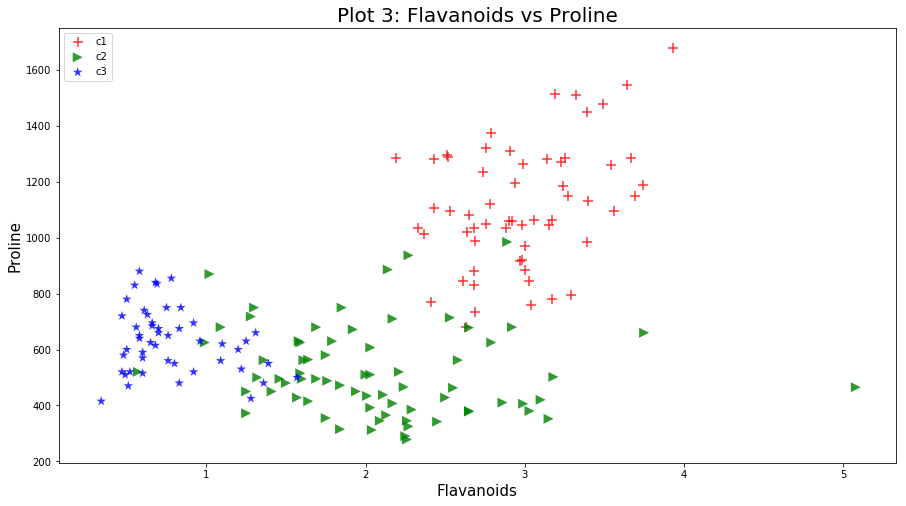

In [265]:
import numpy as np
import matplotlib.pyplot as plt
 
data = (c1_sub3, c2_sub3, c3_sub3)
colors = ("red", "green", "blue")
groups = ("c1", "c2", "c3")
markers = ("+",">","*")
 
# Create plot
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot( 1,1,1,axisbg="1.0")
 
for data, color, group, mark in zip(data, colors, groups, markers):
    x, y = data
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=100, label=group, marker=mark)
 
ax.set_title('Plot 3: Flavanoids vs Proline', size=20)
ax.set_xlabel("Flavanoids", size=15)
ax.set_ylabel("Proline", size=15)
plt.legend(loc=2)
plt.show()

##Problem 1-b)

Ans:

The above plot is based on the "Flavanoids" and "Proline" variables which found from the above TWO feature selection process (mutual_info_classif  and f_classif), we can see that there is NOT very clear on the partition between Classes, especially between c3 and c2. the c1 is more stand out in this case, but there is still NOT so obivious for the classes division by these 2 variables.

According to observations, I would propose the best 2 variables to be used for wine classification would be "Color Intensity" and "Proline" (by SelectKBest function with Chi-Square statistic). They are not just showing the clear separation between the Class labels, they are also very less correlated. However, further classification analysis would be necessary for explore more detail on the data. 

##Problem 2-a: Decision Tree Classification

Ans:

2-a-i)
According to the below, I have chosen the D.T. Model with the following parameters: (criterion=Entropy, Max Depth = 3, min samples leaf = 1). This decision is based on the Training and Testing Scores which are NOT too far off avoid the over-fitting problem. Also, Model Complexity is also one of the factors that I have considered, so this model is the highest accuracy with the least complex level. By comparing the Gini and Entropy Model, I would choose the Entopy criteron model due to its model complexity is the least with fairly high accuracy result.

2-a-ii-1)
The accuracy of training set is  100.0 %

2-a-ii-2)
The accuracy of testing set is  95.0819672131 %

In [18]:
print(x.shape)
x.head(5)

(178, 13)


,Alcohol,Malic_acid,Ash,Alca_ash,Magnesium,phenols,Flavanoids,Nonflav_phenols,Proanthocyanins,Color_int,Hue,diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [19]:
print(y.shape)
y.head(5)

(178,)


0    1
1    1
2    1
3    1
4    1
Name: Labels, dtype: int64

In [10]:
#Split the train set, test set, train class, test class
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, #Predictor Variables
                                                 y, #Class labels
                                                 stratify=y, #data is split in a stratified fashion, using this as the class labels
                                                 test_size=0.34,#Test size is set as 34% of entire set
                                                 random_state=28) # Set the randon state for spliting data  in same order

In [11]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(117, 13)
(61, 13)
(117,)
(61,)


In [12]:
#Import Desision Tree, Naive Bayes , K-Nearest Neighors
from sklearn import neighbors, tree, naive_bayes

####Decision Tree Classifer with default setting

In [25]:
#Set up Decision Tree classifier with ALL default setting
treeclf = tree.DecisionTreeClassifier()
#Plug in the train dataset with target class
treeclf = treeclf.fit(x_train, y_train)
treeclf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [26]:
#Classify the Target Class
y_pre = treeclf.predict(x_test)
print (y_pre.shape)

(61,)


In [27]:
#Generate the Classification Report
#Generate the precision, recall, F1 score for each class
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pre))

             precision    recall  f1-score   support

          1       1.00      0.85      0.92        20
          2       0.85      0.92      0.88        24
          3       0.89      0.94      0.91        17

avg / total       0.91      0.90      0.90        61



In [28]:
#Generate confustion matrix 
#Columns represent the Actual Values 1 through 3 from top to bottom
#Rows represent the Predicted Values 1 through 3 from left to right
from sklearn.metrics import confusion_matrix
tree_cm = confusion_matrix(y_test, y_pre, labels=[1,2,3])
print (tree_cm)

[[17  3  0]
 [ 0 22  2]
 [ 0  1 16]]


In [29]:
#The average Accuracy score across the train instances
print (treeclf.score(x_train, y_train)*100,"%")

100.0 %


In [30]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pre)*100,"%")

90.1639344262 %


####Decision Tree Classifer with with criterion gini index

In [13]:
def DT_Acc_func(MaxDepth,Min_Samples_Leaf, x_train, y_train, x_test, y_test, cri):
    train_score_lst=[]
    test_score_lst=[]
    max_samples_leaf_lst=[]
    for i in range(1,Min_Samples_Leaf+1):
        treeclf_entropy = tree.DecisionTreeClassifier(criterion = cri, 
                                                      random_state = 28,
                                                      max_depth=MaxDepth, 
                                                      min_samples_leaf=i)        
        #Plug in the train dataset with target class
        treeclf_entropy = treeclf_entropy.fit(x_train, y_train)
        y_pre = treeclf_entropy.predict(x_test)
        max_samples_leaf_lst.append(i)
        #Store the scores in the list 
        train_score_lst.append(treeclf_entropy.score(x_train, y_train))
        test_score_lst.append(treeclf_entropy.score(x_test, y_test))
        
    score_df=pd.DataFrame({'train_score':train_score_lst,'test_score':test_score_lst,"max_samples_leaf":max_samples_leaf_lst})
    score_df.plot(x='max_samples_leaf',figsize=(10,5))
    plt.title('Training and Testing Score (Max Tree Depth = %d)'%(MaxDepth))
    plt.xlabel('Min Samples Leaf ')
    plt.ylabel('Score')
    plt.xlim([0,Min_Samples_Leaf])
    plt.show()
    return

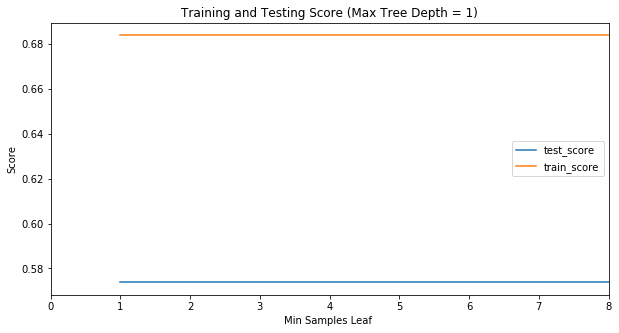

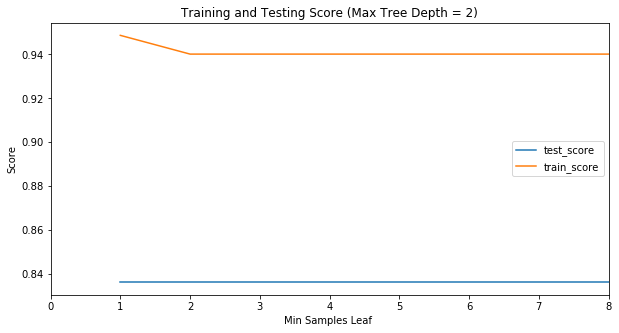

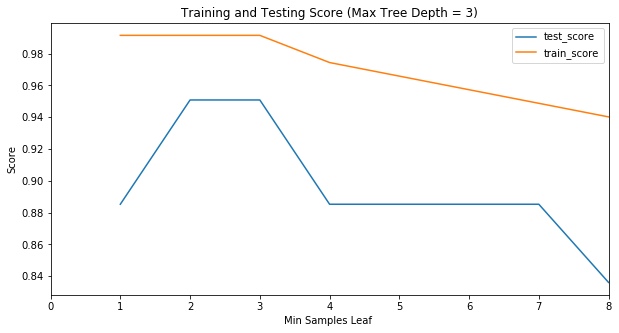

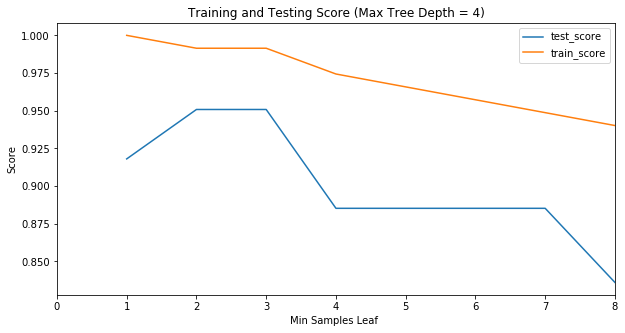

In [14]:
for j in range(1,5):
    MaxDepth=j
    DT_Acc_func(MaxDepth,8,x_train, y_train, x_test, y_test, cri='gini')

In [15]:
treeclf_gini = tree.DecisionTreeClassifier(criterion = "gini", 
                                      random_state = 28,
                                      max_depth=3, 
                                      min_samples_leaf=2)
#Plug in the train dataset with target class
treeclf_gini = treeclf_gini.fit(x_train, y_train)
treeclf_gini

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=28, splitter='best')

In [16]:
#Classify the Target Class
y_pre = treeclf_gini.predict(x_test)
print (y_pre.shape)

(61,)


In [17]:
#The average Accuracy score across the train instances
print ("The accuracy of training set is ",treeclf_gini.score(x_train, y_train)*100,"%")

The accuracy of training set is  99.1452991453 %


In [18]:
from sklearn.metrics import accuracy_score
print("The accuracy of testing set is ",accuracy_score(y_test, y_pre)*100,"%")

The accuracy of testing set is  95.0819672131 %


According to the above, I have chosen the D.T. Model with the following parameters: (gini, Max Depth = 3, min_samples_leaf = 2). This decision is based on the Training and Testing Scores which are NOT too far off avoid the over-fitting problem. Also, Model Complexity is also one of the factors that I have considered, so this model is the highest accuracy with the least complex level.

####Decision Tree Graph :gini, Max Depth = 3 , Min Sameples Leaf =2

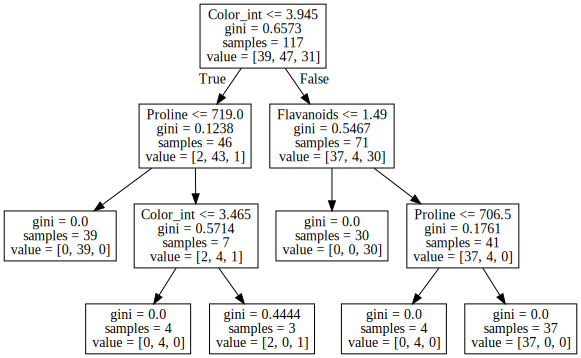

In [19]:
import graphviz 
tree_image=tree.export_graphviz(treeclf_gini,
                        out_file=None,
                        feature_names=wine.columns[1:]
                       ) 
graph = graphviz.Source(tree_image) 
graph

####Decision Tree Classifer with with criterion entropy index

In [83]:
def DT_Acc_func(MaxDepth,Min_Samples_Leaf, x_train, y_train, x_test, y_test, cri):
    train_score_lst=[]
    test_score_lst=[]
    max_samples_leaf_lst=[]
    for i in range(1,Min_Samples_Leaf+1):
        treeclf_entropy = tree.DecisionTreeClassifier(criterion = cri, 
                                                      random_state = 28,
                                                      max_depth=MaxDepth, 
                                                      min_samples_leaf=i)        
        #Plug in the train dataset with target class
        treeclf_entropy = treeclf_entropy.fit(x_train, y_train)
        y_pre = treeclf_entropy.predict(x_test)
        max_samples_leaf_lst.append(i)
        
        train_score_lst.append(treeclf_entropy.score(x_train, y_train))
        test_score_lst.append(treeclf_entropy.score(x_test, y_test))
        
    score_df=pd.DataFrame({'train_score':train_score_lst,'test_score':test_score_lst,"max_samples_leaf":max_samples_leaf_lst})
    score_df.plot(x='max_samples_leaf',figsize=(10,5))
    plt.title('Training and Testing Score (Max Tree Depth = %d)'%(MaxDepth))
    plt.xlabel('Max Samples Leaf ')
    plt.ylabel('Score')
    plt.xlim([0,Min_Samples_Leaf])
    plt.show()
    return

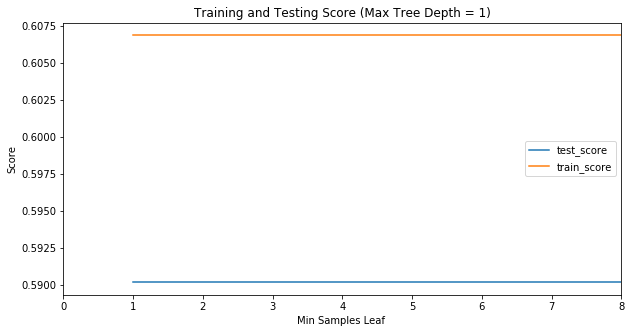

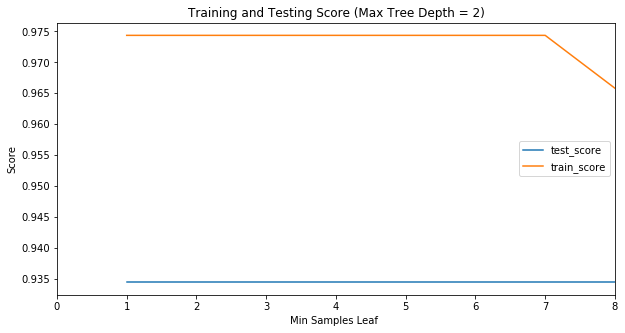

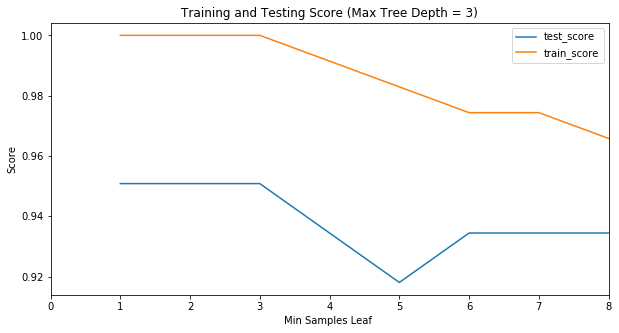

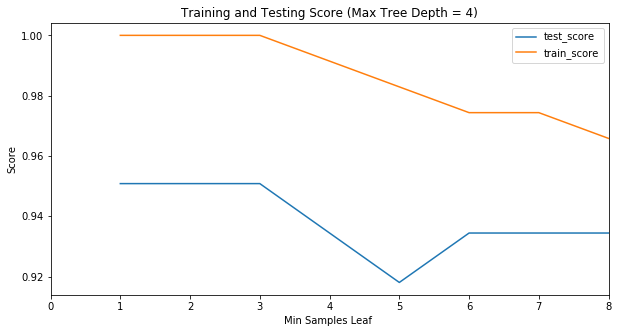

In [20]:
for j in range(1,5):
    MaxDepth=j
    DT_Acc_func(MaxDepth,8,x_train, y_train, x_test, y_test, cri='entropy')

In [21]:
#This function is proceeded by the above the most optimal result, max_depth=3, min_samples_leaf=1 
treeclf_entropy = tree.DecisionTreeClassifier(criterion = "entropy", 
                                          random_state = 28,
                                          max_depth=3, 
                                          min_samples_leaf=1)
#Plug in the train dataset with target class
treeclf_entropy = treeclf_entropy.fit(x_train, y_train)
y_pre = treeclf_entropy.predict(x_test)
print(y_pre.shape)

(61,)


In [22]:
#The average Accuracy score across the train instances
print ("The accuracy of training set is ",treeclf_entropy.score(x_train, y_train)*100,"%")

The accuracy of training set is  100.0 %


In [23]:
from sklearn.metrics import accuracy_score
print("The accuracy of testing set is ",accuracy_score(y_test, y_pre)*100,"%")

The accuracy of testing set is  95.0819672131 %


####Decision Tree Graph: Entropy, Max Depth = 3 , Min Sameples Leaf =1

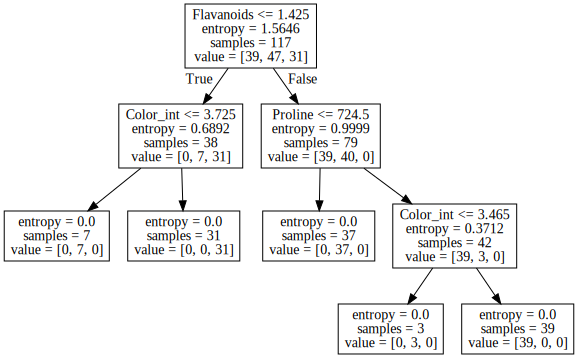

In [24]:
import graphviz 
tree_image=tree.export_graphviz(treeclf_entropy,
                        out_file=None,
                        feature_names=wine.columns[1:]
                       ) 
graph = graphviz.Source(tree_image) 
graph

##Problem 2-a-iii

Ans:

First of all, the distribution of the Training and Testing datasets should be very similar if they are produced in the same process. With similar distribution, the predictor variables of testing data would be fitted into the model and turns out a more desirable (Higher accuracy) classification result which is our goal to minimize the generalization error.

Refer to the plots below, The Predictor Variables and Class Labels from this set of data was split in stratified fashion as shown above, the distribution of class labels in the training and testing dataset are in the very similar distributed pattern. The D.T. classification above (Accuracy of Train: 100%, Test=95%) shows a very high accuracy which also Fulfills the distribution of the Train and Test dataset are similar enough to generate this classify result.

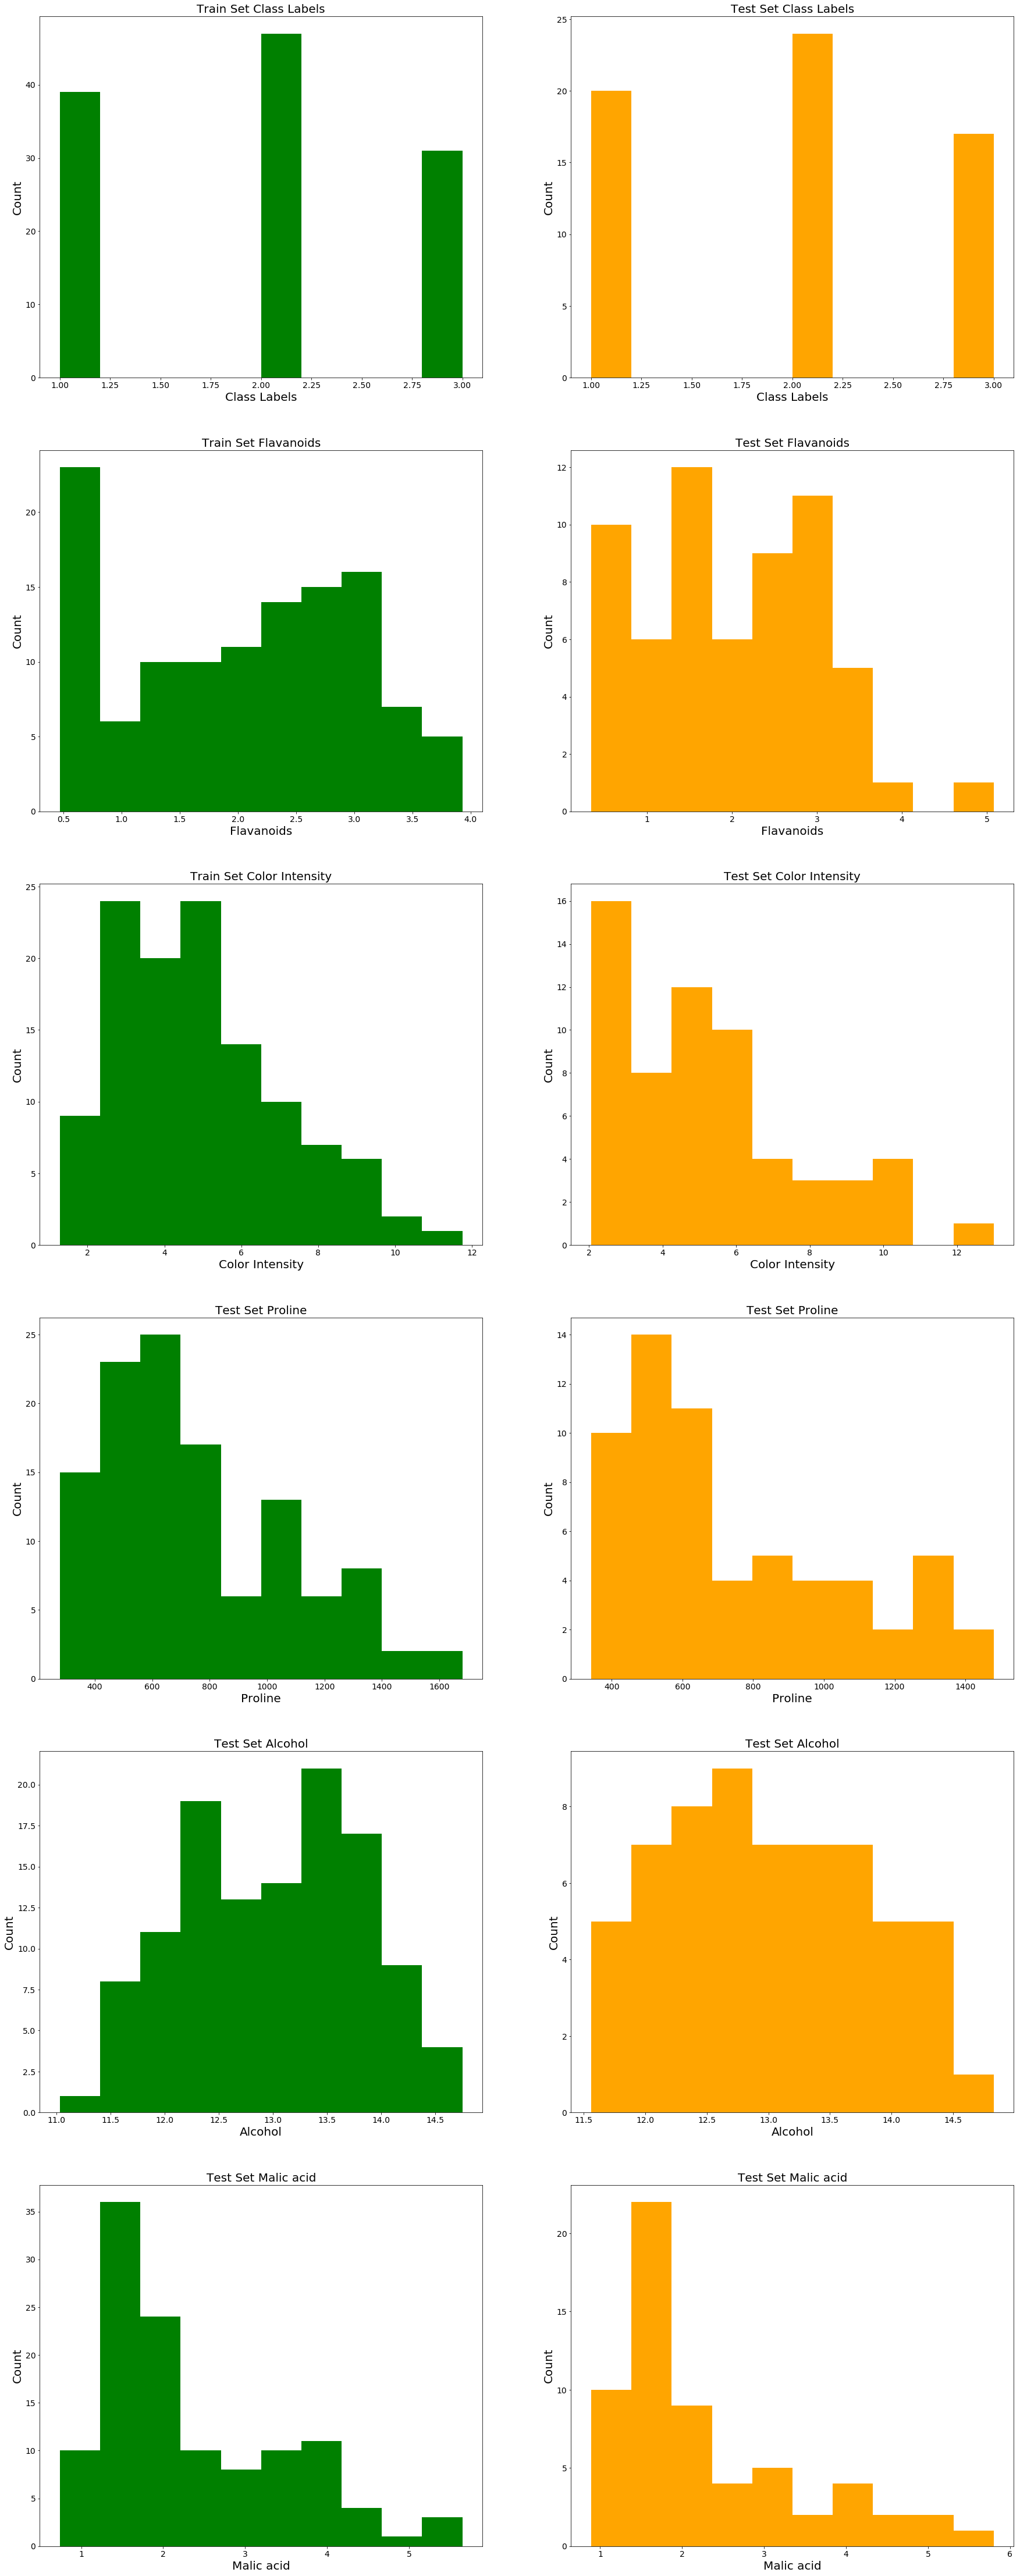

In [43]:
#Using matplotlib module for graph plotting
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(30, 80))
# Create an Axes object.

ax1 = fig.add_subplot(6,2,1) # one row, two column, first plot
# Plot the data.
y_train.plot(kind='hist', color='green')
ax1.set_title("Train Set Class Labels", size=20)
ax1.set_xlabel("Class Labels", size=20)
ax1.set_ylabel("Count", size=20)
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)

ax2 = fig.add_subplot(6,2,2) # one row, two column, first plot
# Plot the data.
y_test.plot(kind='hist', color='orange')
ax2.set_title("Test Set Class Labels", size=20)
ax2.set_xlabel("Class Labels", size=20)
ax2.set_ylabel("Count", size=20)
ax2.tick_params(axis='x', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)

ax3 = fig.add_subplot(6,2,3) # one row, two column, first plot
# Plot the data.
x_train['Flavanoids'].plot(kind='hist', color='green')
ax3.set_title("Train Set Flavanoids", size=20)
ax3.set_xlabel("Flavanoids", size=20)
ax3.set_ylabel("Count", size=20)
ax3.tick_params(axis='x', labelsize=14)
ax3.tick_params(axis='y', labelsize=14)

ax4 = fig.add_subplot(6,2,4) # one row, two column, first plot
# Plot the data.
x_test['Flavanoids'].plot(kind='hist', color='orange')
ax4.set_title("Test Set Flavanoids", size=20)
ax4.set_xlabel("Flavanoids", size=20)
ax4.set_ylabel("Count", size=20)
ax4.tick_params(axis='x', labelsize=14)
ax4.tick_params(axis='y', labelsize=14)

ax5 = fig.add_subplot(6,2,5) # one row, two column, first plot
# Plot the data.
x_train['Color_int'].plot(kind='hist', color='green')
ax5.set_title("Train Set Color Intensity", size=20)
ax5.set_xlabel("Color Intensity", size=20)
ax5.set_ylabel("Count", size=20)
ax5.tick_params(axis='x', labelsize=14)
ax5.tick_params(axis='y', labelsize=14)

ax6 = fig.add_subplot(6,2,6) # one row, two column, first plot
# Plot the data.
x_test['Color_int'].plot(kind='hist', color='orange')
ax6.set_title("Test Set Color Intensity", size=20)
ax6.set_xlabel("Color Intensity", size=20)
ax6.set_ylabel("Count", size=20)
ax6.tick_params(axis='x', labelsize=14)
ax6.tick_params(axis='y', labelsize=14)

ax7 = fig.add_subplot(6,2,7) # one row, two column, first plot
# Plot the data.
x_train['Proline'].plot(kind='hist', color='green')
ax7.set_title("Test Set Proline", size=20)
ax7.set_xlabel("Proline", size=20)
ax7.set_ylabel("Count", size=20)
ax7.tick_params(axis='x', labelsize=14)
ax7.tick_params(axis='y', labelsize=14)

ax8 = fig.add_subplot(6,2,8) # one row, two column, first plot
# Plot the data.
x_test['Proline'].plot(kind='hist', color='orange')
ax8.set_title("Test Set Proline", size=20)
ax8.set_xlabel("Proline", size=20)
ax8.set_ylabel("Count", size=20)
ax8.tick_params(axis='x', labelsize=14)
ax8.tick_params(axis='y', labelsize=14)

ax9 = fig.add_subplot(6,2,9) # one row, two column, first plot
# Plot the data.
x_train['Alcohol'].plot(kind='hist', color='green')
ax9.set_title("Test Set Alcohol", size=20)
ax9.set_xlabel("Alcohol", size=20)
ax9.set_ylabel("Count", size=20)
ax9.tick_params(axis='x', labelsize=14)
ax9.tick_params(axis='y', labelsize=14)

ax10 = fig.add_subplot(6,2,10) # one row, two column, first plot
# Plot the data.
x_test['Alcohol'].plot(kind='hist', color='orange')
ax10.set_title("Test Set Alcohol", size=20)
ax10.set_xlabel("Alcohol", size=20)
ax10.set_ylabel("Count", size=20)
ax10.tick_params(axis='x', labelsize=14)
ax10.tick_params(axis='y', labelsize=14)

ax11 = fig.add_subplot(6,2,11) # one row, two column, first plot
# Plot the data.
x_train['Malic_acid'].plot(kind='hist', color='green')
ax11.set_title("Test Set Malic acid", size=20)
ax11.set_xlabel("Malic acid", size=20)
ax11.set_ylabel("Count", size=20)
ax11.tick_params(axis='x', labelsize=14)
ax11.tick_params(axis='y', labelsize=14)

ax12 = fig.add_subplot(6,2,12) # one row, two column, first plot
# Plot the data.
x_test['Malic_acid'].plot(kind='hist', color='orange')
ax12.set_title("Test Set Malic acid", size=20)
ax12.set_xlabel("Malic acid", size=20)
ax12.set_ylabel("Count", size=20)
ax12.tick_params(axis='x', labelsize=14)
ax12.tick_params(axis='y', labelsize=14)

##Problem 2-b-i

Ans:

The Accuracy of Training set is  98.0 %

The Accuracy of Testing set is  98.0 %


In [61]:
#Set up Naive Bayes classifier with ALL default setting
nbclf = naive_bayes.GaussianNB()
#Plug in the 66% of training set of data
nbclf=nbclf.fit(x_train,y_train)

In [62]:
#Predict the 34% of Class Labels of Testing data
y_pre=nbclf.predict(x_train)
print(y_pre.shape)

(117,)


In [65]:
from sklearn.metrics import accuracy_score
print("The Accuracy of Training set is ",round(nbclf.score(x_train, y_train),2)*100,"%")

The Accuracy of Training set is  98.0 %


In [67]:
#Predict the 34% of Class Labels of Testing data
y_pre=nbclf.predict(x_test)
print(y_pre.shape)

(61,)


In [68]:
from sklearn.metrics import accuracy_score
print("The Accuracy of Testing set is ",round(accuracy_score(y_test, y_pre),2)*100,"%")

The Accuracy of Testing set is  98.0 %


##Problem 2-b-ii)

Ans:

The assumption of data for Naive Bayes Classifier are based on Gaussian distribution. According to the above histogram, the variables might NOT completely satisfied the assumption. The Class label is very close to the Standard distribution,but the predictor variables are mostly skewed  distributed. 


The other assumption is that the predictor variables are supposed to be independent to each other. Based on the correlation table above, we could observe that variables are mostly correlated. In this case, I would say that they are NOT completely independent to each other. However, the Naive Bayes Model works very well even if variables are NOT perfectly independent. As you seen in the below classification result, we could concluded that the result is not quite impacted by the violated assumption

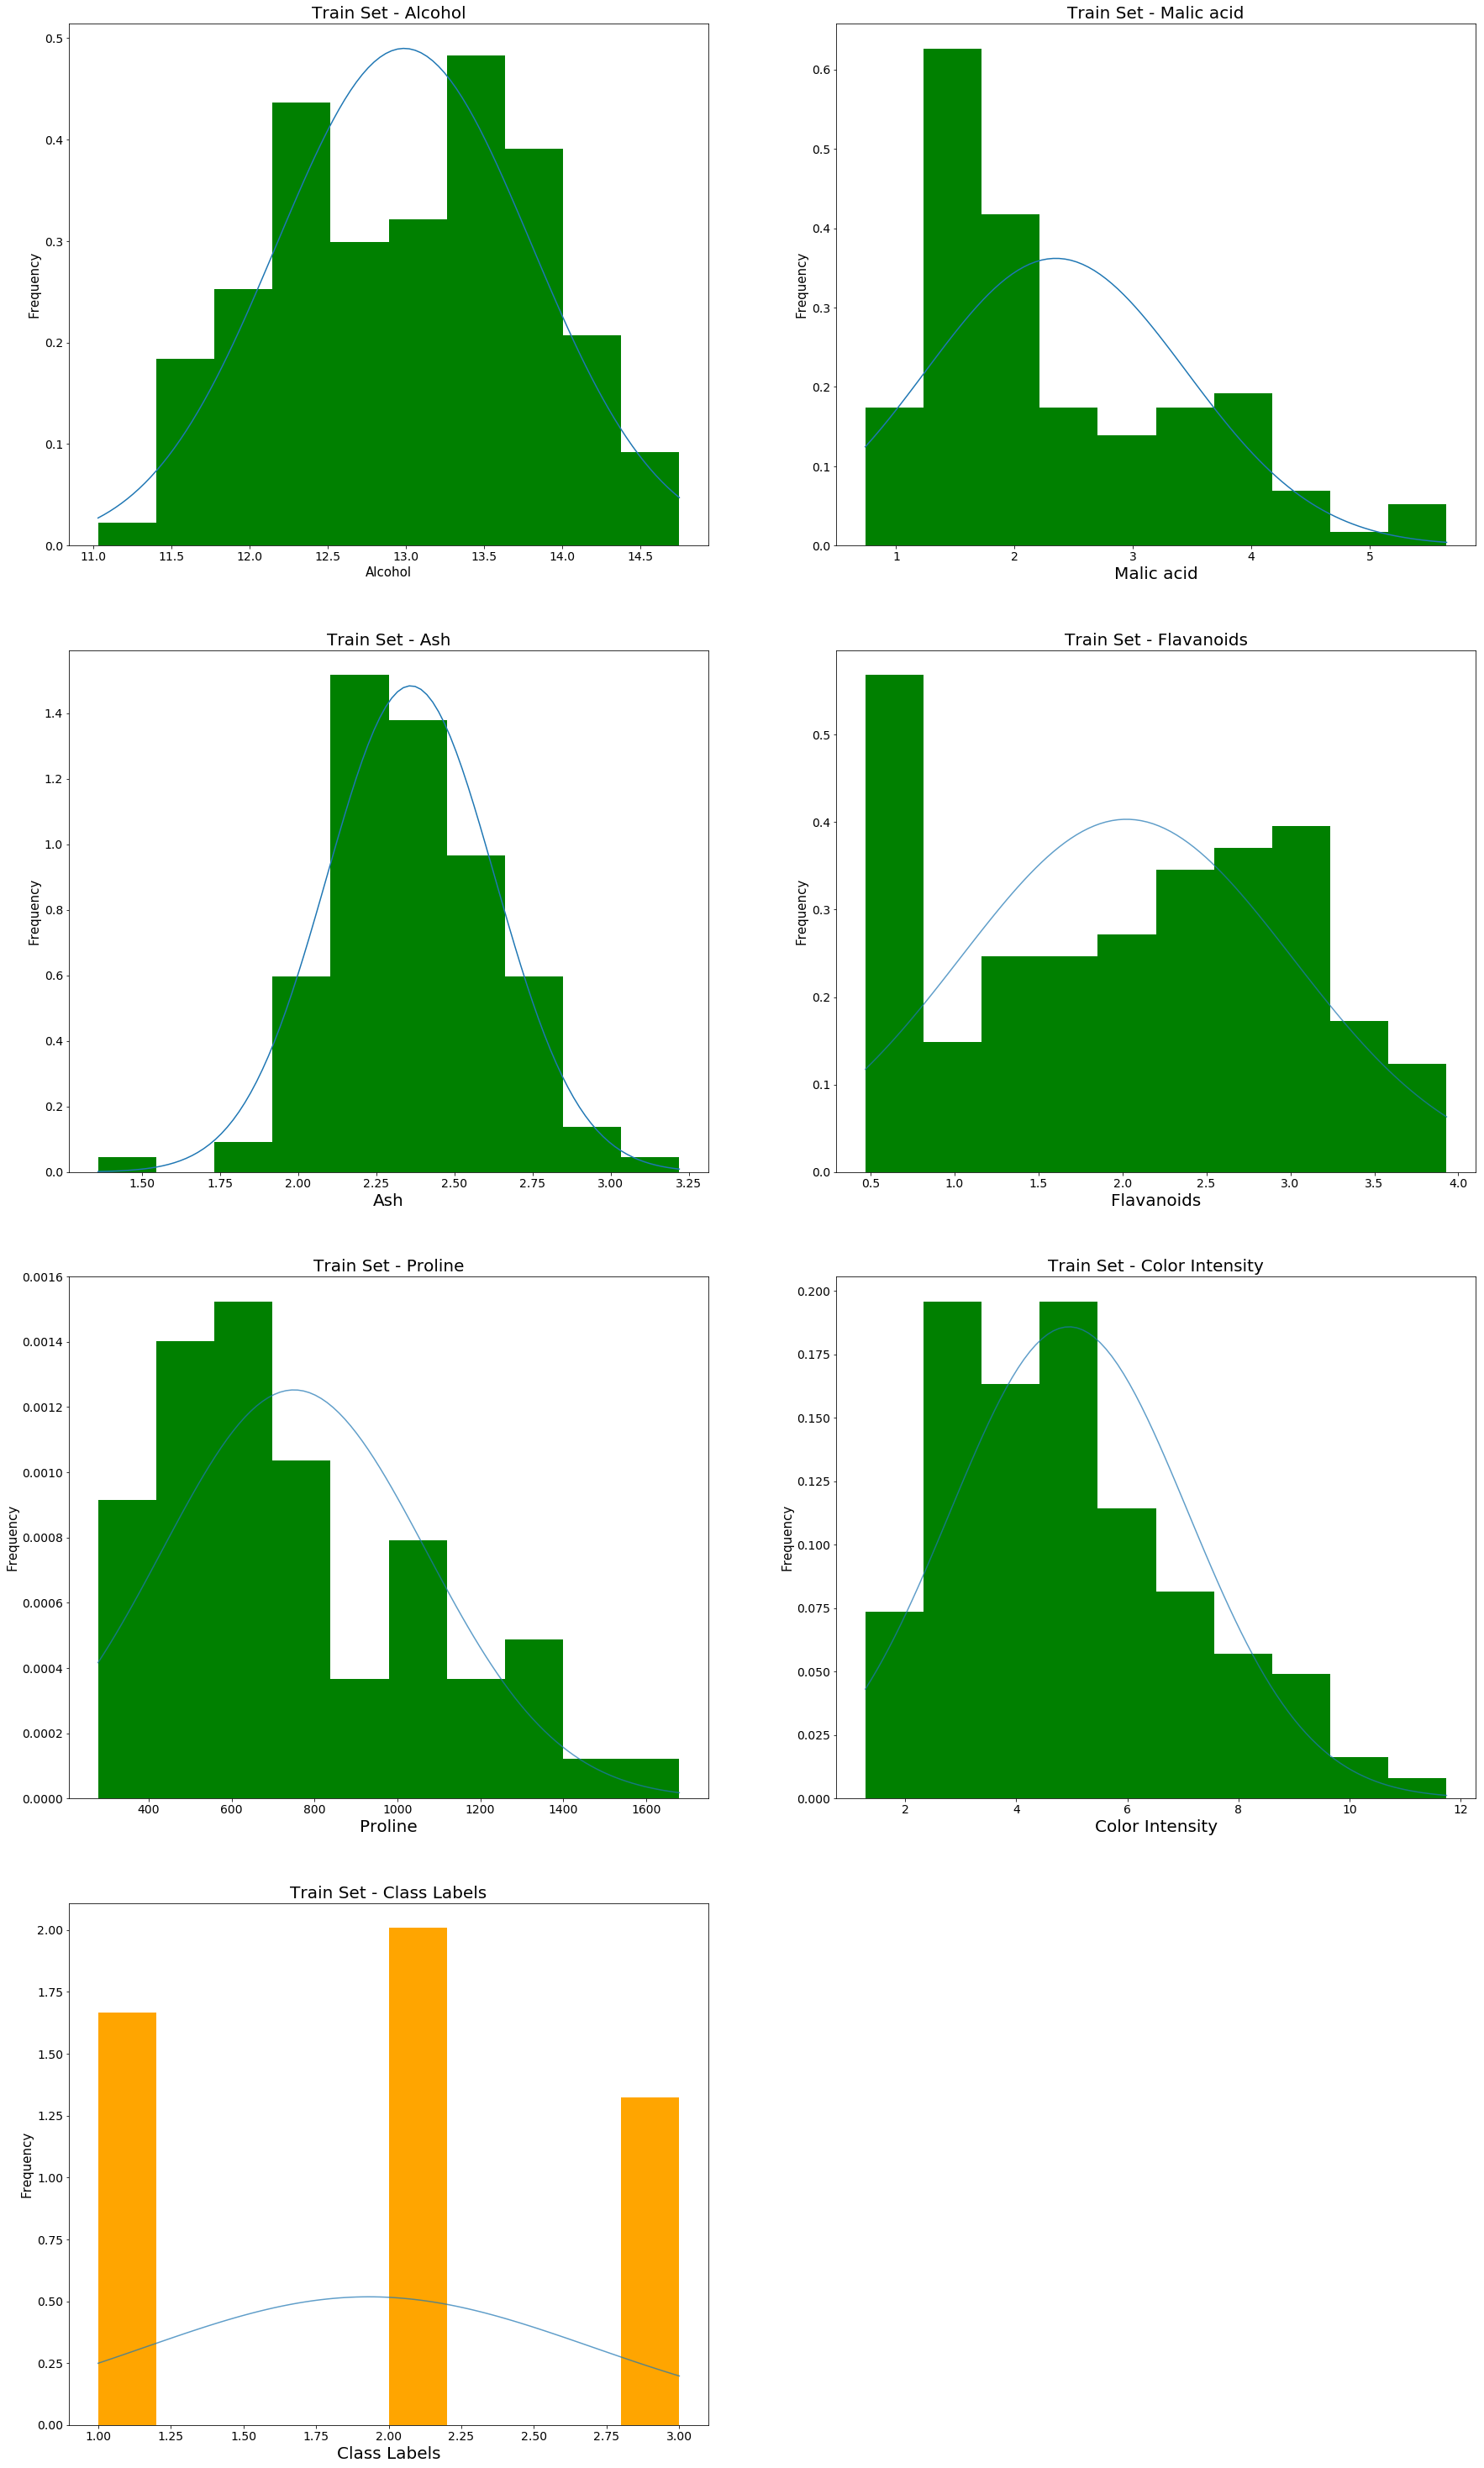

In [80]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab

fig = plt.figure(figsize=(30, 80))
# Create an Axes object.

ax1 = fig.add_subplot(6,2,1) 
# Plot the data.
x_data = x_train["Alcohol"]
x_data.plot(kind='hist',normed=True, color='green')
ax1.set_title("Train Set - Alcohol", size=20)
ax1.set_xlabel("Alcohol", size=15)
ax1.set_ylabel("Frequency", size=15)
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)

mean = np.mean(x_data)
variance = np.var(x_data)
sigma = np.sqrt(variance)
x = np.linspace(min(x_data), max(x_data), 100)
ax1.plot(x, mlab.normpdf(x, mean, sigma))



ax2 = fig.add_subplot(6,2,2) 
# Plot the data.
x_data = x_train["Malic_acid"]
x_data.plot(kind='hist',normed=True,color='green')
ax2.set_title("Train Set - Malic acid", size=20)
ax2.set_xlabel("Malic acid", size=20)
ax2.set_ylabel("Frequency", size=15)
ax2.tick_params(axis='x', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)

mean = np.mean(x_data)
variance = np.var(x_data)
sigma = np.sqrt(variance)
x = np.linspace(min(x_data), max(x_data), 100)
ax2.plot(x, mlab.normpdf(x, mean, sigma))

ax3 = fig.add_subplot(6,2,3) 
# Plot the data.
x_data = x_train["Ash"]
x_data.plot(kind='hist',normed=True,color='green')
ax3.set_title("Train Set - Ash", size=20)
ax3.set_xlabel("Ash", size=20)
ax3.set_ylabel("Frequency", size=15)
ax3.tick_params(axis='x', labelsize=14)
ax3.tick_params(axis='y', labelsize=14)

mean = np.mean(x_data)
variance = np.var(x_data)
sigma = np.sqrt(variance)
x = np.linspace(min(x_data), max(x_data), 100)
ax3.plot(x, mlab.normpdf(x, mean, sigma))

ax4 = fig.add_subplot(6,2,4)
# Plot the data.
x_data = x_train["Flavanoids"]
x_data.plot(kind='hist',normed=True,color='green')
ax4.set_title("Train Set - Flavanoids", size=20)
ax4.set_xlabel("Flavanoids", size=20)
ax4.set_ylabel("Frequency", size=15)
ax4.tick_params(axis='x', labelsize=14)
ax4.tick_params(axis='y', labelsize=14)

mean = np.mean(x_data)
variance = np.var(x_data)
sigma = np.sqrt(variance)
x = np.linspace(min(x_data), max(x_data), 100)
ax4.plot(x, mlab.normpdf(x, mean, sigma), alpha = 75)

ax5 = fig.add_subplot(6,2,5)
# Plot the data.
x_data = x_train["Proline"]
x_data.plot(kind='hist',normed=True,color='green')
ax5.set_title("Train Set - Proline", size=20)
ax5.set_xlabel("Proline", size=20)
ax5.set_ylabel("Frequency", size=15)
ax5.tick_params(axis='x', labelsize=14)
ax5.tick_params(axis='y', labelsize=14)

mean = np.mean(x_data)
variance = np.var(x_data)
sigma = np.sqrt(variance)
x = np.linspace(min(x_data), max(x_data), 100)
ax5.plot(x, mlab.normpdf(x, mean, sigma), alpha = 75)

ax6 = fig.add_subplot(6,2,6)
# Plot the data.
x_data = x_train["Color_int"]
x_data.plot(kind='hist',normed=True,color='green')
ax6.set_title("Train Set - Color Intensity", size=20)
ax6.set_xlabel("Color Intensity", size=20)
ax6.set_ylabel("Frequency", size=15)
ax6.tick_params(axis='x', labelsize=14)
ax6.tick_params(axis='y', labelsize=14)

mean = np.mean(x_data)
variance = np.var(x_data)
sigma = np.sqrt(variance)
x = np.linspace(min(x_data), max(x_data), 100)
ax6.plot(x, mlab.normpdf(x, mean, sigma), alpha = 75)

ax7 = fig.add_subplot(6,2,7)
# Plot the data.
x_data = y_train
x_data.plot(kind='hist',normed=True,color='orange')
ax7.set_title("Train Set - Class Labels", size=20)
ax7.set_xlabel("Class Labels", size=20)
ax7.set_ylabel("Frequency", size=15)
ax7.tick_params(axis='x', labelsize=14)
ax7.tick_params(axis='y', labelsize=14)

mean = np.mean(x_data)
variance = np.var(x_data)
sigma = np.sqrt(variance)
x = np.linspace(min(x_data), max(x_data), 100)
ax7.plot(x, mlab.normpdf(x, mean, sigma), alpha = 75)


plt.show()


##Problem 2-c-i

###Before Normalizing the data

In [229]:
#Set the neigbhors and run the KNN Classifier 
n_neighbors=1
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance',metric='minkowski')
knnclf.fit(x_train, y_train)
#Predict the testing set
y_pre=knnclf.predict(x_test)

print("Accuracy for Traning Data with k=",n_neighbors,"is",knnclf.score(x_train,y_train)*100,"%")
print("Accuracy for Traning Data with k=",n_neighbors,"is",accuracy_score(y_test,y_pre)*100,"%")

Accuracy for Traning Data with k= 1 is 100.0 %
Accuracy for Traning Data with k= 1 is 73.7704918033 %


In [231]:
y_pre.shape

(61,)

In [232]:
#Set the neigbhors and run the KNN Classifier 
n_neighbors=3
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance',metric='minkowski')
knnclf.fit(x_train, y_train)
#Predict the testing set
y_pre=knnclf.predict(x_test)

print("Accuracy for Traning Data with k=",n_neighbors,"is",knnclf.score(x_train,y_train)*100,"%")
print("Accuracy for Traning Data with k=",n_neighbors,"is",accuracy_score(y_test,y_pre)*100,"%")

Accuracy for Traning Data with k= 3 is 100.0 %
Accuracy for Traning Data with k= 3 is 70.4918032787 %


In [233]:
y_pre.shape

(61,)

In [234]:
#Set the neigbhors and run the KNN Classifier 
n_neighbors=5
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance',metric='minkowski')
knnclf.fit(x_train, y_train)
#Predict the testing set
y_pre=knnclf.predict(x_test)
print("Accuracy for Traning Data with k=",n_neighbors,"is",knnclf.score(x_train,y_train)*100,"%")
print("Accuracy for Traning Data with k=",n_neighbors,"is",accuracy_score(y_test,y_pre)*100,"%")

Accuracy for Traning Data with k= 5 is 100.0 %
Accuracy for Traning Data with k= 5 is 68.8524590164 %


In [235]:
y_pre.shape

(61,)

###After Normalizing the Data

In [238]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler().fit(x_train)
x_train_norm=min_max_scaler.transform(x_train)
x_test_norm=min_max_scaler.transform(x_test)
print(x_train_norm.shape)
print(x_test_norm.shape)

(117, 13)
(61, 13)


In [244]:
#Checking the Training dataset after normalizing
x_train_norm[0]

array([ 0.83064516,  0.15071283,  0.51612903,  0.31958763,  0.27173913,
        0.41071429,  0.56647399,  0.24528302,  0.36392405,  0.35530086,
        0.53448276,  0.6352459 ,  0.7146933 ])

In [245]:
#Checking the Testing dataset after normalizing
x_test_norm[0]

array([ 0.34946237,  0.0509165 ,  0.3172043 ,  0.21649485,  0.7173913 ,
        0.27678571,  0.39884393,  0.41509434,  0.74050633,  0.20248329,
        0.43965517,  0.42622951,  0.33666191])

In [240]:
#Set the neigbhors and run the KNN Classifier 
n_neighbors=1
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance',metric='minkowski')
knnclf.fit(x_train_norm, y_train)
#Predict the testing set
y_pre=knnclf.predict(x_test_norm)

print("Accuracy for Traning Data with k=",n_neighbors,"is",knnclf.score(x_train_norm,y_train)*100,"%")
print("Accuracy for Traning Data with k=",n_neighbors,"is",accuracy_score(y_test,y_pre)*100,"%")

Accuracy for Traning Data with k= 1 is 100.0 %
Accuracy for Traning Data with k= 1 is 96.7213114754 %


In [241]:
#Set the neigbhors and run the KNN Classifier 
n_neighbors=3
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance',metric='minkowski')
knnclf.fit(x_train_norm, y_train)
#Predict the testing set
y_pre=knnclf.predict(x_test_norm)

print("Accuracy for Traning Data with k=",n_neighbors,"is",knnclf.score(x_train_norm,y_train)*100,"%")
print("Accuracy for Traning Data with k=",n_neighbors,"is",accuracy_score(y_test,y_pre)*100,"%")

Accuracy for Traning Data with k= 3 is 100.0 %
Accuracy for Traning Data with k= 3 is 95.0819672131 %


In [242]:
#Set the neigbhors and run the KNN Classifier 
n_neighbors=5
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance',metric='minkowski')
knnclf.fit(x_train_norm, y_train)
#Predict the testing set
y_pre=knnclf.predict(x_test_norm)

print("Accuracy for Traning Data with k=",n_neighbors,"is",knnclf.score(x_train_norm,y_train)*100,"%")
print("Accuracy for Traning Data with k=",n_neighbors,"is",accuracy_score(y_test,y_pre)*100,"%")

Accuracy for Traning Data with k= 5 is 100.0 %
Accuracy for Traning Data with k= 5 is 98.3606557377 %


##Problem 2-c-ii:

The above analysis is used various values of k=1,3,5 (Number of neighbors). The parameters for fitting the model includes the weight of distance which means that the closer neighors offer more influence than the further neighbors to the testing instance. Euclidean distance (i.e. minkowski) is used as the similarity measure. 

According to the above result, we should normalize the data before fitting the model and predicting the testing data. The resaon is that the more larger numeric number dominates in the Euclidean equation. Consquently, the Class label in the prediction will be majorly influenced by the predictor variables with the largest numeric numbers. For this reason, the result from the normalized data offers almost 30% more accuracy in the k=5 analysis. 

##Problem 3-1:

Why lower training error is not always a good thing? 

Ans:
Lower training error sometimes is not a good result when the analysis ran into a over-fitting situation. Based on the image below, we can see that the Model Complexity getting higher, the lower the training error, but the higher testing error. In this case, we call it a over-fitting result which means that the model highly fits in the training data, but it fails to predict the additional/future data as accuracy as the training data. So that it results in a over-fitting situation. 

In our modeling process, we should consider the variance of errors between the training and testing data. The optimal point (i.e. the least error) of the training and testing error is the spot has the least variance of error between the training and testing data. Then we could avoid the under-fitting and over-fitting results

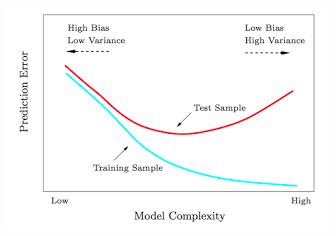

In [249]:
from IPython.display import Image
Image("pic1.png",width=500, height=500)

##Problem 3-2: 

Why collectively relevant features may look individually irrelevant?

Ans:
In classification analysis, some features may look individually irrelevant because they might NOT be highly correlated with the Class labels accordingly. In this case, we might have a thought that the features might be classified as irrelevant to the class labels. 

However, those individual irrelevant features might be able to implicitly expressed in the constructed features (i.e. a function of features), then that combined feature would be turned into a very informative predictor variable for the analysis. One of common methods of feature transformation is PCA which finds the variance of the data by using features transformation is an unsurprised method.

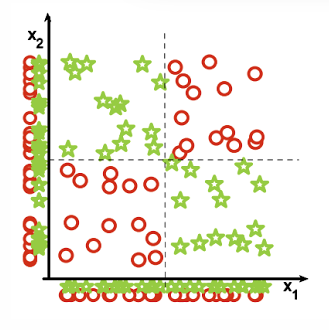

In [250]:
from IPython.display import Image
Image("pic2.png",width=500, height=500)

#####Problem 3-3: 

Why irrelevant features hurt kNN, clustering, and other similarity based methods?

Ans:

Those similarity based methods, e.g. kNN and clustering, classifies class labels by utilizing the Distance function (e.g. Eculidean and Cosine Similarity) to find the most similar instances. Since that, the irrelevant features basically makes quite amount of impact on the result because they will includes in the distance function.  For this reason, I would suggest to check on the relevance level of evey individual feature before running the similarity based analysis.

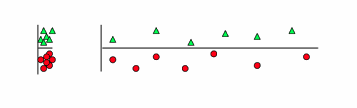

In [251]:
from IPython.display import Image
Image("pic3.png",width=500, height=500)

#####Problem 3-4: 

What does it mean Occam razor?

Ans:

Occam razor means that the simiplest explanation is most likey the correct one in to explain most of events occured. Refer this principal the classification process, I would say that the simpler model would tell the more accurate result, e.g. The less of variables or predictors would probably generates more powerful/accurate 
regression or classification models (Assuming chossen variables are irrelevant.)

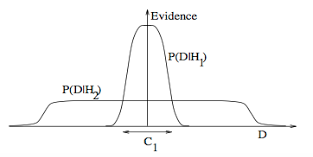

In [252]:
from IPython.display import Image
Image("pic4.png",width=500, height=500)